# Task #1: covid c mortalities cumulative analysis

### Part A 

**Replicate the two graphs we created in Section 2 and 3 for the column ’Deaths’. Pick
N = 20 countries and start Day 0 at K = 10 deaths.**

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings('ignore')

In [195]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [196]:
from adjustText import adjust_text

**1. Import all the packages needed and load the file created in the 1st part: (covid a master cumulative table).**

In [197]:
covid_cumulative = pd.read_excel("covid_a_master_cumulative_table.xlsx")
covid_cumulative.head(10)

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
0,0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,4,0,0,2019-12-31,Austria,8858775.0,Europe
5,5,0,0,2019-12-31,Azerbaijan,10047719.0,Europe
6,6,0,0,2019-12-31,Bahrain,1641164.0,Asia
7,7,0,0,2019-12-31,Belarus,9452409.0,Europe
8,8,0,0,2019-12-31,Belgium,11455519.0,Europe
9,9,0,0,2019-12-31,Brazil,211049519.0,America


**2. Filter the last day for every country and create the pandas.DataFrame 'last_day_per_country’.**

In [198]:
last_day_per_country = covid_cumulative.groupby(by=['Countries'])['Date'].max()
last_day_per_country = last_day_per_country.to_frame()
last_day_per_country.reset_index(inplace=True)
last_day_per_country.head(10)

,Countries,Date
0,Afghanistan,2020-08-27
1,Albania,2020-08-27
2,Algeria,2020-08-27
3,Andorra,2020-08-27
4,Angola,2020-08-27
5,Anguilla,2020-08-27
6,Antigua_and_Barbuda,2020-08-27
7,Argentina,2020-08-27
8,Armenia,2020-08-27
9,Aruba,2020-08-27


**3. Define the number of top countries you wish to plot (N = 20). Join with the dataframe
’covid cumulative’ with ’last day per country’ and sort the values of ’Deaths’ in descending order. Slice the top N countries and convert the country names to a list.**

In [199]:
N = 20
last_day = pd.merge(covid_cumulative, last_day_per_country, how='inner', left_on = ['Countries', 'Date'], right_on = ['Countries', 'Date'])
last_day = last_day.sort_values('Deaths', ascending=False)
top_countries = last_day[:N]['Countries'].tolist()
top_countries

['USA',
 'Brazil',
 'Mexico',
 'India',
 'UK',
 'Italy',
 'France',
 'Spain',
 'Peru',
 'Iran',
 'Colombia',
 'Russia',
 'S.Africa',
 'Chile',
 'Belgium',
 'Germany',
 'Canada',
 'Argentina',
 'Indonesia',
 'Iraq']

**4. Filter rows in the dataframe ’covid cumulative’ that contain values of the top N countries and more than K = 10 confirmed deaths.**

In [200]:
K = 10    ### day 0 - The day at which cumulative death count exceeded 10
covid_top_countries = covid_cumulative[covid_cumulative.Countries.isin(top_countries)]
covid_top_countries = covid_top_countries[covid_top_countries['Deaths'] > K]
covid_top_countries.head(10)

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
3781,3781,61,12,2020-02-25,Iran,82913893.0,Asia
3848,3848,95,15,2020-02-26,Iran,82913893.0,Asia
3852,3852,322,11,2020-02-26,Italy,60359546.0,Europe
3915,3915,139,19,2020-02-27,Iran,82913893.0,Asia
3919,3919,400,12,2020-02-27,Italy,60359546.0,Europe
3982,3982,245,26,2020-02-28,Iran,82913893.0,Asia
3986,3986,650,17,2020-02-28,Italy,60359546.0,Europe
4049,4049,388,34,2020-02-29,Iran,82913893.0,Asia
4053,4053,888,21,2020-02-29,Italy,60359546.0,Europe
4116,4116,593,43,2020-03-01,Iran,82913893.0,Asia


**5. Create dataframe 'day 0 for every country' that identifies Day 0 for each of the top N
countries by applying groupby and min in the previously filtered dataframe.**

In [201]:
# FIND THE DATE THAT THE FIRST K CASES WERE IDENTIFIED
day_0_for_every_country = covid_top_countries.groupby(by=['Countries']).min()
day_0_for_every_country = day_0_for_every_country['Date']
day_0_for_every_country

Countries
Argentina   2020-03-27
Belgium     2020-03-15
Brazil      2020-03-21
Canada      2020-03-21
Chile       2020-04-01
Colombia    2020-03-31
France      2020-03-09
Germany     2020-03-16
India       2020-03-26
Indonesia   2020-03-20
Iran        2020-02-25
Iraq        2020-03-18
Italy       2020-02-26
Mexico      2020-03-28
Peru        2020-03-28
Russia      2020-04-01
S.Africa    2020-04-06
Spain       2020-03-10
UK          2020-03-15
USA         2020-03-05
Name: Date, dtype: datetime64[ns]

**6. Merge it back with the original dataframe 'covid top countries' and subtract columns 'Date x' and 'Day 0' to calculate the 'Days from 0'.**

In [202]:
covid_top_countries = covid_top_countries.merge(day_0_for_every_country, how='inner', on='Countries')
covid_top_countries.rename(columns = {'Date_y': 'Day_0'}, inplace = True)
covid_top_countries['Days_from_0'] = (covid_top_countries['Date_x'] - covid_top_countries['Day_0']).dt.days
covid_top_countries.head(20)

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4
5,4116,593,43,2020-03-01,Iran,82913893.0,Asia,2020-02-25,5
6,4183,978,54,2020-03-02,Iran,82913893.0,Asia,2020-02-25,6
7,4236,1501,66,2020-03-03,Iran,82913893.0,Asia,2020-02-25,7
8,4282,2336,77,2020-03-04,Iran,82913893.0,Asia,2020-02-25,8
9,4328,2922,92,2020-03-05,Iran,82913893.0,Asia,2020-02-25,9


**7.Generate the Dataframe max_deaths**

In [203]:
max_deaths = covid_top_countries.groupby(by=['Countries']).max()
max_deaths.sort_values('Deaths', ascending=False, inplace=True)
max_deaths.drop('Unnamed: 0', axis = 1, inplace = True)
max_deaths

,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0
Countries,,,,,,,
USA,5821876,179714,2020-08-27,3.290649e+08,America,2020-03-05,175
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159
Mexico,573888,62076,2020-08-27,1.275755e+08,America,2020-03-28,152
India,3310234,60472,2020-08-27,1.366418e+09,Asia,2020-03-26,154
UK,328846,41465,2020-08-27,6.664711e+07,Europe,2020-03-15,165
Italy,262540,35458,2020-08-27,6.035955e+07,Europe,2020-02-26,183
France,253587,30544,2020-08-27,6.701288e+07,Europe,2020-03-09,171
Spain,419849,28971,2020-08-26,4.693706e+07,Europe,2020-03-10,169
Peru,613378,28124,2020-08-27,3.251046e+07,America,2020-03-28,152


In [204]:
# FUNCTION THAT GIVES YOU THE DOUBLING SLOPE OF 1, 2, 3, 7 DAYS
x1 = np.array([0, 15])
x2 = np.array([0, 30])
x3 = np.array([0, 45])
x7 = np.array([0, 105])

y_1 = np.array([K, K*2**(x1[1])])
y_2 = np.array([K, K*2**(x2[1]/2)])
y_3 = np.array([K, K*2**(x3[1]/3)])
y_7 = np.array([K, K*2**(x7[1]/7)])

**8. Use the Seaborn package (abbreviated as sns) to plot the lines of the countries cases and the theoretical lines for the doubling of cases. Some aesthetic considerations:**

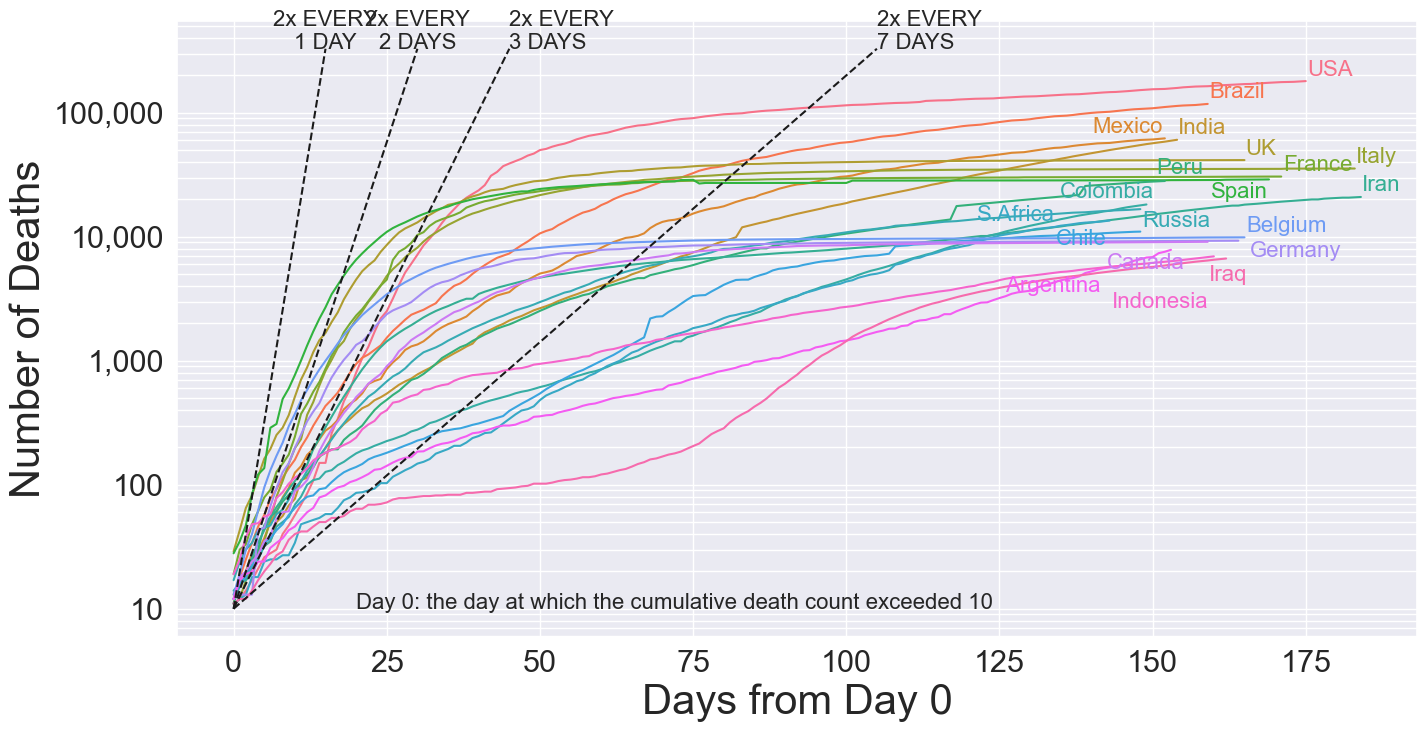

In [205]:
sns.set(rc={'figure.figsize':(16,8)}, font_scale = 2)
style = dict(size=10, color='gray')

ax = sns.lineplot(x="Days_from_0", y="Deaths", hue="Countries", data=covid_top_countries, markers=True, hue_order=top_countries, legend=False)
ax.set_yscale('log')
plt.grid(True, which='both')
ax.plot(x1, y_1, 'k--')
ax.plot(x2, y_2, 'k--')
ax.plot(x3, y_3, 'k--')
ax.plot(x7, y_7, 'k--')
ax.set_xlabel("Days from Day 0",fontsize=30)
ax.set_ylabel("Number of Deaths",fontsize=30)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.xlim([0, 150])
plt.text(20, 10, 'Day 0: the day at which the cumulative death count exceeded {:.0f}'.format(K), fontsize=16)
plt.text(x1.max(), y_1.max(), '2x EVERY\n1 DAY', ha = 'center', fontsize=16)
plt.text(x2.max(), y_2.max(), '2x EVERY\n2 DAYS', ha = 'center', fontsize=16)
plt.text(x3.max(), y_3.max(), '2x EVERY\n3 DAYS', ha = 'left', fontsize=16)
plt.text(x7.max(), y_7.max(), '2x EVERY\n7 DAYS', ha = 'left', fontsize=16)
texts = [plt.text(max_deaths.loc[str(country)]['Days_from_0'], max_deaths.loc[str(country)]['Deaths'], str(country), fontsize=16, color=ax.get_lines()[top_countries.index(country)].get_c(), ha = 'center', va = 'center') for country in top_countries]
adjust_text(texts)

plt.savefig('Fig_1_1_Dokhale_Priyadarshani.png')


## Plot the daily cases moving averages

Since we have the cumulative cases in the last df, we will calculate the moving slope of the last 7 days (back calc = 7) using the stats.linregress, a statistical function from the SciPy package.

In [206]:
# back_calc IS THE BACK WINDOW THAT IS USED TO CALCULATE THE SLOPE
back_calc = 7
slope_df = pd.DataFrame(columns=['Countries', 'Days_from_0', 'Slope', 'R2', 'P_value'])

for country in top_countries:
    one_country_data = covid_top_countries[covid_top_countries['Countries'] == str(country)].reset_index(drop=True)
#     one_country_data['log_cases'] = np.log10(one_country_data['Cases'])
    for i in np.arange(back_calc, len(one_country_data)+1):
        x = one_country_data.loc[i-back_calc: i, 'Days_from_0'] # That is the 'Days_from_0'
        y = one_country_data.loc[i-back_calc: i, 'Deaths'] # 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_country_data.loc[i-1, 'Slope'] = slope
        one_country_data.loc[i-1, 'R2'] = r_value * r_value
        one_country_data.loc[i-1, 'P_value'] = p_value
        one_country = one_country_data[['Countries', 'Days_from_0', 'Slope', 'R2', 'P_value']]
    
    slope_df = slope_df.append(one_country, ignore_index=False)
    

slope_df.head(15)

,Countries,Days_from_0,Slope,R2,P_value
0,USA,0,NaN,NaN,NaN
1,USA,1,NaN,NaN,NaN
2,USA,2,NaN,NaN,NaN
3,USA,3,NaN,NaN,NaN
4,USA,4,NaN,NaN,NaN
5,USA,5,NaN,NaN,NaN
6,USA,6,3.011905,0.974751,0.000005
7,USA,7,3.738095,0.958956,0.000022
8,USA,8,4.464286,0.952415,0.000034
9,USA,9,5.404762,0.941221,0.000065


In [207]:
slope_df.set_index('Countries', drop=False, inplace=True)

In [208]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Countries']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Countries'] = max_slope.index

data_1_5 = slope_df[slope_df.Countries.isin(max_slope[:5]['Countries'].tolist())]
countries_1_5 = max_slope[:5]['Countries'].tolist()
data_6_10 = slope_df[slope_df.Countries.isin(max_slope[5:10]['Countries'].tolist())]
countries_6_10 = max_slope[5:10]['Countries'].tolist()
data_11_15 = slope_df[slope_df.Countries.isin(max_slope[10:15]['Countries'].tolist())]
countries_11_15 = max_slope[10:15]['Countries'].tolist()
data_16_20 = slope_df[slope_df.Countries.isin(max_slope[15:20]['Countries'].tolist())]
countries_16_20 = max_slope[15:20]['Countries'].tolist()
max_slope

,Days_from_0,Slope,R2,P_value,Countries
Countries,,,,,
USA,175,2876.345238,0.998196,0.001091,USA
Brazil,159,1152.630952,0.997301,0.000060,Brazil
France,171,1010.666667,0.998144,0.019353,France
UK,165,977.142857,0.996646,0.000400,UK
India,154,971.190476,0.999857,0.000778,India
Peru,152,922.119048,0.999988,0.030433,Peru
Spain,169,872.214286,0.999424,1.000000,Spain
Italy,183,821.571429,0.999744,0.045427,Italy
Mexico,152,802.785714,0.996012,0.000237,Mexico


In [209]:
#Not to duplicate any index values
data_1_5['uniqid'] = data_1_5['Countries']+data_1_5['Days_from_0'].astype(str)
data_1_5 = data_1_5.set_index('uniqid')
data_6_10['uniqid'] = data_6_10['Countries']+data_6_10['Days_from_0'].astype(str)
data_6_10 = data_6_10.set_index('uniqid')
data_11_15['uniqid'] = data_11_15['Countries']+data_11_15['Days_from_0'].astype(str)
data_11_15 = data_11_15.set_index('uniqid')
data_16_20['uniqid'] = data_16_20['Countries']+data_16_20['Days_from_0'].astype(str)
data_16_20 = data_16_20.set_index('uniqid')

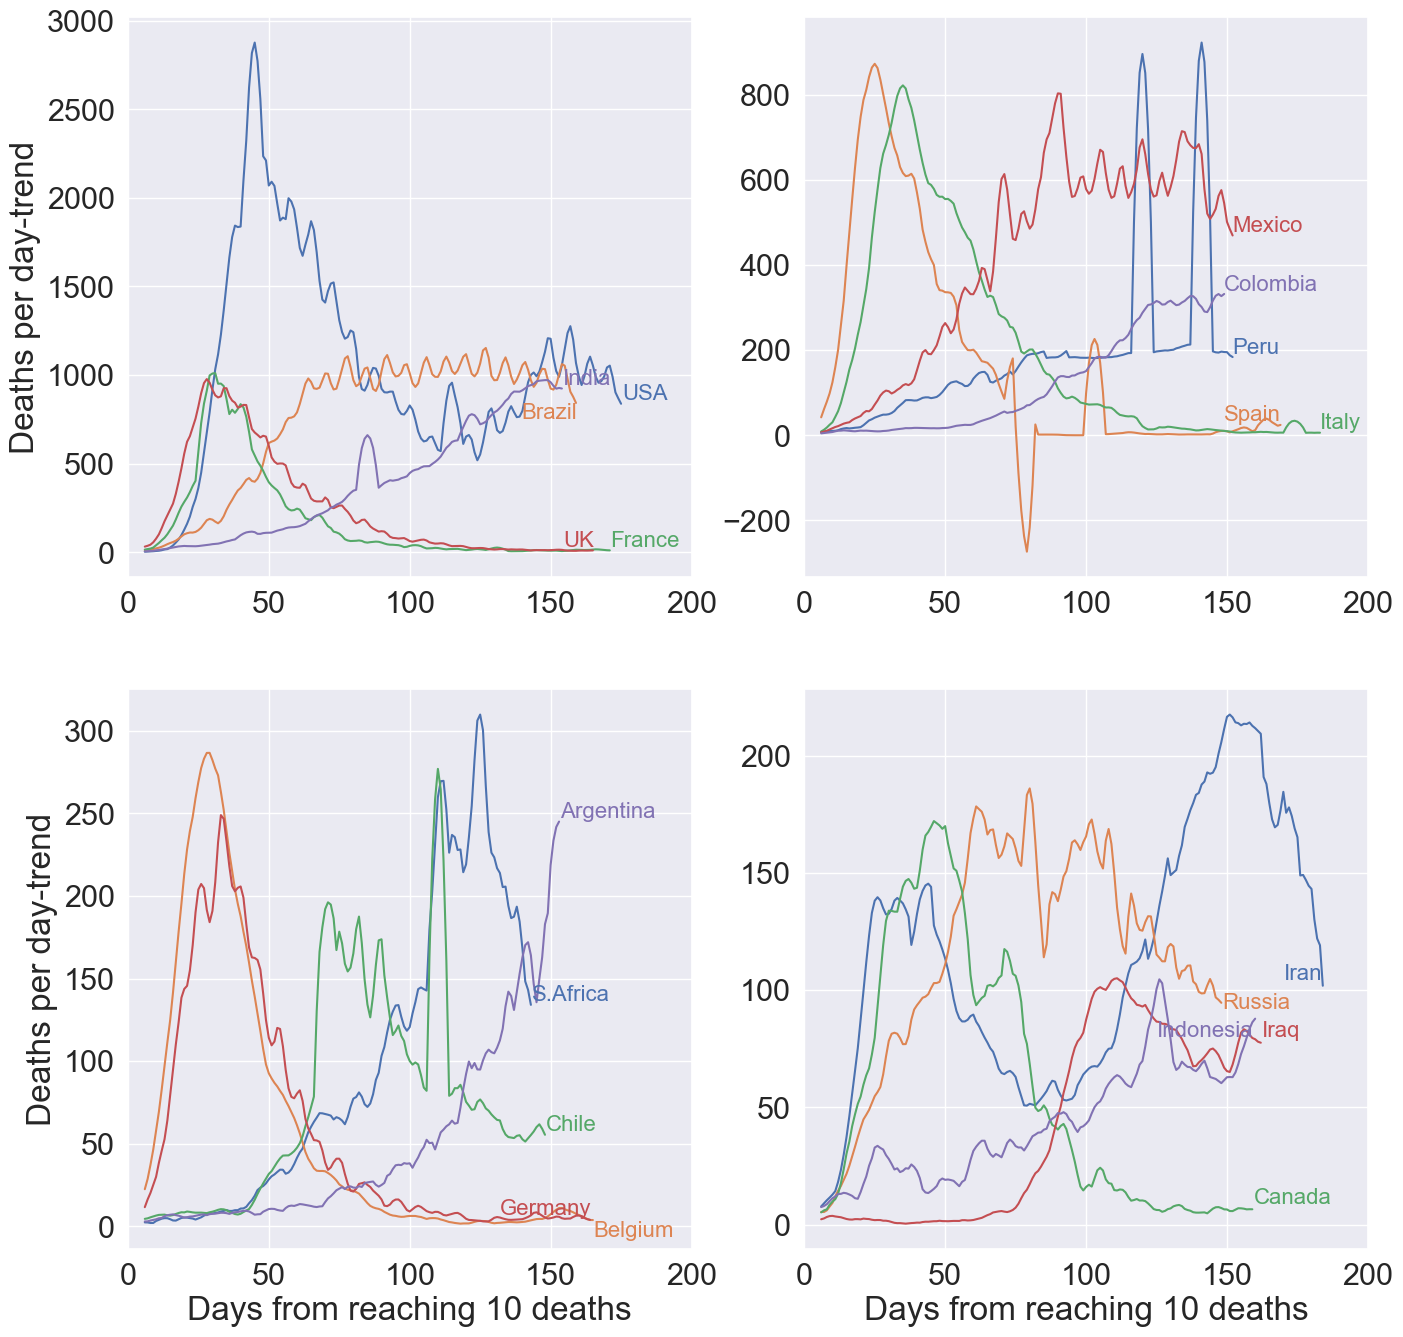

In [210]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_1_5, markers=True, hue_order=countries_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 0].get_lines()[countries_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Deaths per day-trend",fontsize=24)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_6_10, markers=True, hue_order=countries_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 1].get_lines()[countries_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in countries_6_10]
adjust_text(texts)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_11_15, markers=True, hue_order=countries_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 0].get_lines()[countries_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Deaths per day-trend",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching 10 deaths",fontsize=24)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_16_20, markers=True, hue_order=countries_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 1].get_lines()[countries_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching 10 deaths",fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])
# axes[0, 0].set_yscale('log')
# axes[0, 1].set_yscale('log')
# axes[1, 0].set_yscale('log')
# axes[1, 1].set_yscale('log')

plt.savefig('Fig_1_2_Dokhale_Priyadarshani.png')

### Part B

A term that people started studying after the first few months of the pandemic is that of excess deaths. Excess deaths are the additional deaths to the typical death rate that are due to Covid-19. 
To calculate the excess deaths, you need an estimate of the typical death rate per country. Use the table ’Death rate crude per 1000 people.xls’ with the code below to import and make some changes in the dataframe (the data set is downloaded from the World Bank Data).

In [211]:
death_rate = pd.read_excel("Death_rate_crude_per_1000_people.xls", sheet_name='Data', header=3, index_col=0).drop(columns=['Country Code','Indicator Name','Indicator Code'])
death_rate.head(20)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,6.388000,6.241000,6.11800,6.012000,5.920000,5.839000,5.770000,5.71600,5.682000,5.666000,...,7.918000,8.061000,8.205000,8.347000,8.488000,8.627000,8.765000,8.907000,NaN,NaN
Afghanistan,32.219000,31.649000,31.09300,30.551000,30.022000,29.501000,28.985000,28.46800,27.946000,27.418000,...,8.250000,7.936000,7.645000,7.380000,7.141000,6.929000,6.742000,6.575000,NaN,NaN
Angola,27.097000,26.859000,26.62700,26.407000,26.194000,25.966000,25.690000,25.34200,24.916000,24.418000,...,11.680000,11.039000,10.451000,9.921000,9.454000,9.052000,8.716000,8.432000,NaN,NaN
Albania,11.326000,10.719000,10.17500,9.707000,9.320000,9.009000,8.762000,8.55500,8.366000,8.184000,...,6.841000,6.915000,6.996000,7.096000,7.219000,7.367000,7.534000,7.714000,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.800000,NaN,3.900000,NaN,NaN,NaN,4.300000,NaN,NaN,NaN
Arab World,20.165357,19.681097,19.20542,18.733835,18.264036,17.796667,17.335919,16.88604,16.448101,16.019212,...,5.681657,5.644353,5.608534,5.571311,5.532235,5.491656,5.451218,5.413473,NaN,NaN
United Arab Emirates,15.714000,14.761000,13.81400,12.890000,11.999000,11.148000,10.339000,9.56700,8.830000,8.132000,...,1.403000,1.382000,1.369000,1.363000,1.366000,1.377000,1.398000,1.429000,NaN,NaN
Argentina,8.567000,8.618000,8.67900,8.747000,8.813000,8.871000,8.917000,8.95000,8.969000,8.976000,...,7.708000,7.694000,7.680000,7.665000,7.651000,7.638000,7.626000,7.616000,NaN,NaN
Armenia,9.646000,9.249000,8.83700,8.419000,8.005000,7.609000,7.242000,6.91000,6.623000,6.385000,...,9.739000,9.753000,9.761000,9.774000,9.796000,9.823000,9.849000,9.862000,NaN,NaN


In [212]:
death_rate = death_rate.ffill(axis=1).iloc[:,-1]
death_rate = death_rate.to_frame(name="Death rate per 1000")
death_rate['Countries'] = death_rate.index
death_rate.replace('United States','USA',inplace=True)
death_rate.replace('United Kingdom','UK',inplace=True)
death_rate.replace('Korea, Rep.','S.Korea',inplace=True)
death_rate.replace('Iran, Islamic Rep.','Iran',inplace=True)
death_rate.replace('Saudi Arabia','S.Arabia',inplace=True)
death_rate.replace('South Africa','S.Africa',inplace=True)
death_rate.head(20)

,Death rate per 1000,Countries
Country Name,,
Aruba,8.907000,Aruba
Afghanistan,6.575000,Afghanistan
Angola,8.432000,Angola
Albania,7.714000,Albania
Andorra,4.300000,Andorra
Arab World,5.413473,Arab World
United Arab Emirates,1.429000,United Arab Emirates
Argentina,7.616000,Argentina
Armenia,9.862000,Armenia


**You have to left join the dataframe ’death rate’ with the dataframe ’covid top countries’ on ’Countries’ to make sure that your main table has the information you need.**

In [213]:
covid_top_countries_updated = covid_top_countries.merge(death_rate, how='left', on='Countries')
covid_top_countries_updated.head(20)


,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Death rate per 1000
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0,4.835
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1,4.835
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2,4.835
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3,4.835
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4,4.835
5,4116,593,43,2020-03-01,Iran,82913893.0,Asia,2020-02-25,5,4.835
6,4183,978,54,2020-03-02,Iran,82913893.0,Asia,2020-02-25,6,4.835
7,4236,1501,66,2020-03-03,Iran,82913893.0,Asia,2020-02-25,7,4.835
8,4282,2336,77,2020-03-04,Iran,82913893.0,Asia,2020-02-25,8,4.835
9,4328,2922,92,2020-03-05,Iran,82913893.0,Asia,2020-02-25,9,4.835


In [214]:
covid_top_countries_updated['Typical_deaths_per_day'] = covid_top_countries_updated['Death rate per 1000']* covid_top_countries_updated['Population']/ 1000 /365
covid_top_countries_updated['Typical_cumulative_deaths'] = ( covid_top_countries_updated['Days_from_0'] + 1 )*covid_top_countries_updated['Typical_deaths_per_day']
covid_top_countries_updated['Excess_death_rate'] = covid_top_countries_updated['Deaths'] /covid_top_countries_updated['Typical_cumulative_deaths'] * 100


In [215]:
covid_top_countries_updated.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
covid_top_countries_updated

,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Death rate per 1000,Typical_deaths_per_day,Typical_cumulative_deaths,Excess_death_rate
0,61,12,2020-02-25,Iran,8.291389e+07,Asia,2020-02-25,0,4.835,1098.325131,1.098325e+03,1.092573
1,95,15,2020-02-26,Iran,8.291389e+07,Asia,2020-02-25,1,4.835,1098.325131,2.196650e+03,0.682858
2,139,19,2020-02-27,Iran,8.291389e+07,Asia,2020-02-25,2,4.835,1098.325131,3.294975e+03,0.576636
3,245,26,2020-02-28,Iran,8.291389e+07,Asia,2020-02-25,3,4.835,1098.325131,4.393301e+03,0.591810
4,388,34,2020-02-29,Iran,8.291389e+07,Asia,2020-02-25,4,4.835,1098.325131,5.491626e+03,0.619125
5,593,43,2020-03-01,Iran,8.291389e+07,Asia,2020-02-25,5,4.835,1098.325131,6.589951e+03,0.652509
6,978,54,2020-03-02,Iran,8.291389e+07,Asia,2020-02-25,6,4.835,1098.325131,7.688276e+03,0.702368
7,1501,66,2020-03-03,Iran,8.291389e+07,Asia,2020-02-25,7,4.835,1098.325131,8.786601e+03,0.751144
8,2336,77,2020-03-04,Iran,8.291389e+07,Asia,2020-02-25,8,4.835,1098.325131,9.884926e+03,0.778964
9,2922,92,2020-03-05,Iran,8.291389e+07,Asia,2020-02-25,9,4.835,1098.325131,1.098325e+04,0.837639


In [216]:
max_deaths = covid_top_countries_updated.groupby(by=['Countries']).max()
max_deaths.head(20)

,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0,Death rate per 1000,Typical_deaths_per_day,Typical_cumulative_deaths,Excess_death_rate
Countries,,,,,,,,,,,
Argentina,370175,7839,2020-08-27,4.478068e+07,America,2020-03-27,153,7.616,934.382523,1.438949e+05,5.447726
Belgium,82936,9879,2020-08-27,1.145552e+07,Europe,2020-03-15,165,9.600,301.295842,5.001511e+04,56.547412
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159,6.378,3687.873513,5.900598e+05,19.941200
Canada,126417,9094,2020-08-27,3.741104e+07,America,2020-03-21,159,7.500,768.719959,1.229952e+05,12.999728
Chile,402365,10990,2020-08-27,1.895204e+07,America,2020-04-01,148,6.076,315.486479,4.700749e+04,24.476592
Colombia,572270,18184,2020-08-27,5.033944e+07,America,2020-03-31,149,5.503,758.953301,1.138430e+05,15.972876
France,253587,30544,2020-08-27,6.701288e+07,Europe,2020-03-09,171,9.000,1652.372458,2.842081e+05,28.142643
Germany,237936,9285,2020-08-27,8.301921e+07,Europe,2020-03-16,164,11.300,2570.183855,4.240803e+05,5.365127
India,3310234,60472,2020-08-27,1.366418e+09,Asia,2020-03-26,154,7.210,26991.430194,4.183672e+06,1.445429


In [217]:
max_deaths['Typical_deaths_per_day'] = max_deaths['Death rate per 1000']*max_deaths['Population']/ 1000 /365
max_deaths['Typical_cumulative_deaths'] = (max_deaths['Days_from_0'] + 1)*max_deaths['Typical_deaths_per_day']
max_deaths['Excess_death_rate'] = max_deaths['Deaths'] /max_deaths['Typical_cumulative_deaths']*100 

In [218]:
max_deaths

,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0,Death rate per 1000,Typical_deaths_per_day,Typical_cumulative_deaths,Excess_death_rate
Countries,,,,,,,,,,,
Argentina,370175,7839,2020-08-27,4.478068e+07,America,2020-03-27,153,7.616,934.382523,1.438949e+05,5.447726
Belgium,82936,9879,2020-08-27,1.145552e+07,Europe,2020-03-15,165,9.600,301.295842,5.001511e+04,19.752031
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159,6.378,3687.873513,5.900598e+05,19.941200
Canada,126417,9094,2020-08-27,3.741104e+07,America,2020-03-21,159,7.500,768.719959,1.229952e+05,7.393785
Chile,402365,10990,2020-08-27,1.895204e+07,America,2020-04-01,148,6.076,315.486479,4.700749e+04,23.379255
Colombia,572270,18184,2020-08-27,5.033944e+07,America,2020-03-31,149,5.503,758.953301,1.138430e+05,15.972876
France,253587,30544,2020-08-27,6.701288e+07,Europe,2020-03-09,171,9.000,1652.372458,2.842081e+05,10.747056
Germany,237936,9285,2020-08-27,8.301921e+07,Europe,2020-03-16,164,11.300,2570.183855,4.240803e+05,2.189444
India,3310234,60472,2020-08-27,1.366418e+09,Asia,2020-03-26,154,7.210,26991.430194,4.183672e+06,1.445429


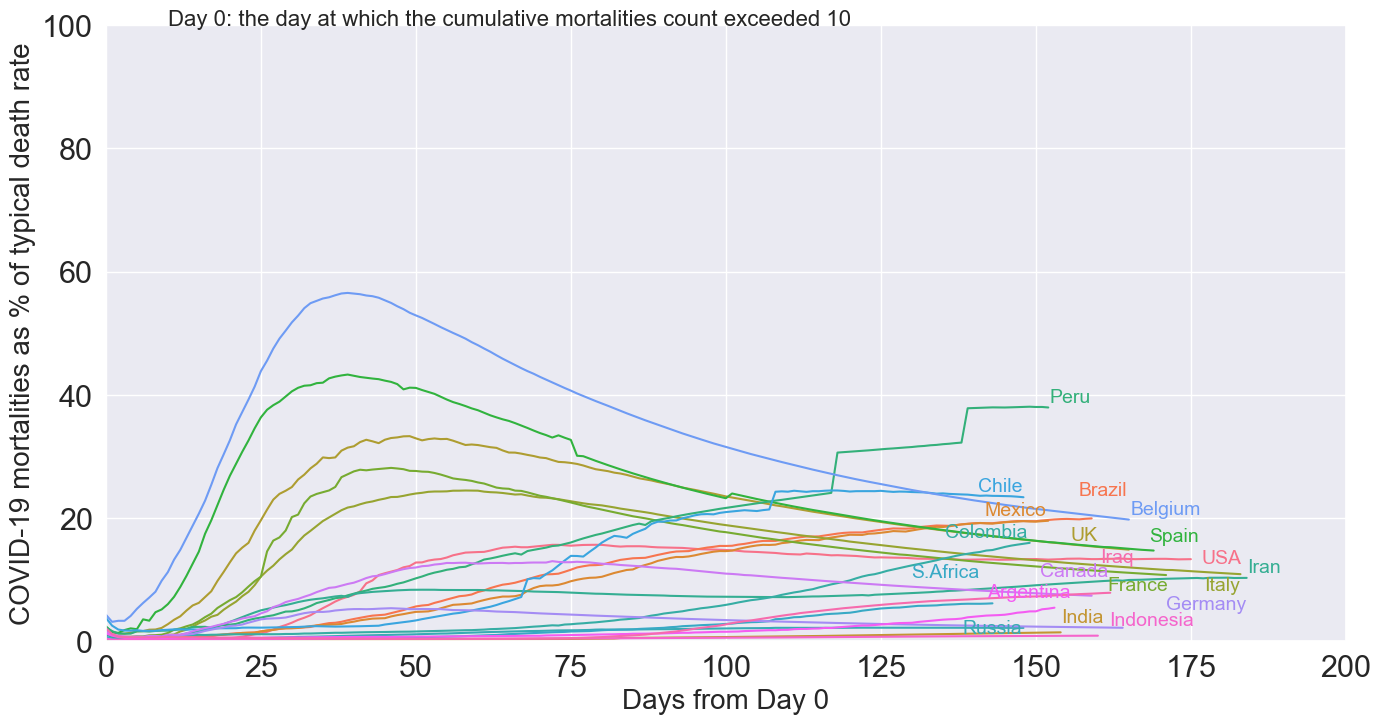

In [219]:
sns.set(rc={'figure.figsize':(16,8)}, font_scale = 2)
style = dict(size=10, color='gray')
ax = sns.lineplot(x="Days_from_0", y="Excess_death_rate", hue="Countries", data=covid_top_countries_updated, markers=True, hue_order=top_countries, legend=False)
ax.set_yscale('linear')
plt.grid(True, which='both')
ax.set_xlabel("Days from Day 0",fontsize=20)
ax.set_ylabel("COVID-19 mortalities as % of typical death rate",fontsize=20)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim([0, 200])
plt.ylim([0, 100])
plt.text(10, 100, 'Day 0: the day at which the cumulative mortalities count exceeded {:.0f}'.format(K), fontsize=16)
texts = [plt.text(max_deaths.loc[str(country)]['Days_from_0'],max_deaths.loc[str(country)]['Excess_death_rate'], str(country), fontsize=14, color=ax.get_lines()[top_countries.index(country)].get_c(), ha = 'center', va = 'center') for country in top_countries]
adjust_text(texts)

plt.savefig('Fig_1_3_Dokhale_Priyadarshani.png')